In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('insurance.csv')


In [3]:
# Display the first few rows of the dataset
print(df.head())


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


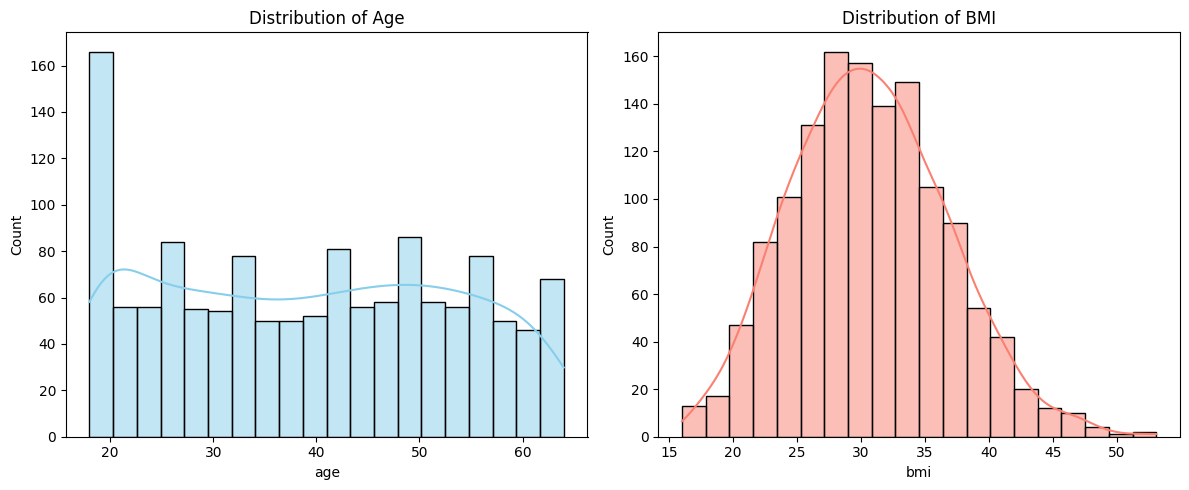

In [4]:
# Exploratory Data Analysis
# Let's start by visualizing the distribution of age, BMI, and expenses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['bmi'], bins=20, kde=True, color='salmon')
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()

In [5]:
# Let's assume that people who spend more than 10000 on expenses get the insurance
df['insurance_approval'] = (df['expenses'] > 10000).astype(int)

In [6]:
# Dropping the 'expenses' column as it's not needed for the classification
df = df.drop('expenses', axis=1)

In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [8]:
# Define features (X) and target (y)
X = df.drop('insurance_approval', axis=1)
y = df['insurance_approval']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize the numerical features
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [11]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9029850746268657
Precision: 0.859504132231405
Recall: 0.9203539823008849
F1 Score: 0.8888888888888888
ROC AUC Score: 0.9528404224950043
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       155
           1       0.86      0.92      0.89       113

    accuracy                           0.90       268
   macro avg       0.90      0.91      0.90       268
weighted avg       0.91      0.90      0.90       268



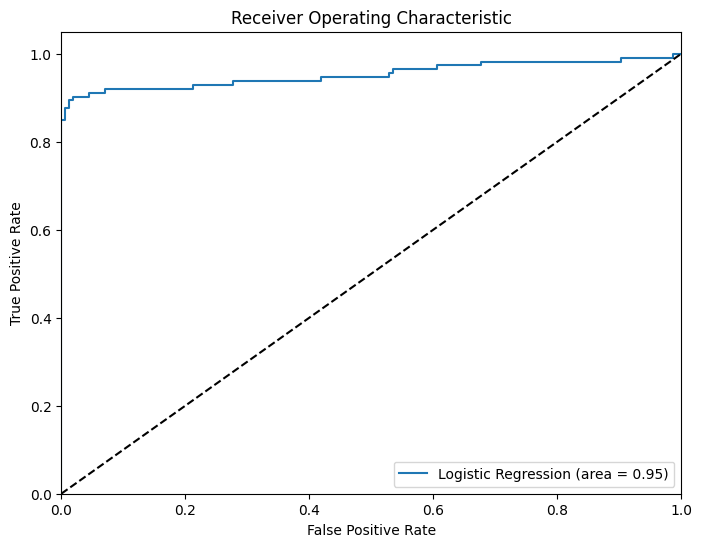

In [14]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Function to predict insurance approval for new data
def predict_insurance_approval(new_data, model, scaler):
    # Assuming new_data is a dictionary with the same structure as the features in X
    new_df = pd.DataFrame(new_data, index=[0])
    new_df = pd.get_dummies(new_df, columns=['sex', 'smoker', 'region'], drop_first=True)
    # Ensure all necessary columns are present
    for col in X.columns:
        if col not in new_df.columns:
            new_df[col] = 0
    new_df = new_df[X.columns]  # Ensure correct column order
    new_df[['age', 'bmi', 'children']] = scaler.transform(new_df[['age', 'bmi', 'children']])
    prediction = model.predict(new_df)
    prediction_proba = model.predict_proba(new_df)[:, 1]
    return prediction[0], prediction_proba[0]

In [16]:
# Example
new_data = {
    'age': 30,
    'sex': 'female',
    'bmi': 28.0,
    'children': 2,
    'smoker': 'yes',
    'region': 'northeast'
}

prediction, prediction_proba = predict_insurance_approval(new_data, model, scaler)
print(f'Insurance Approval Prediction: {prediction}')
print(f'Prediction Probability: {prediction_proba}')

Insurance Approval Prediction: 0
Prediction Probability: 0.12976049789560087
